#### Data Science Capstone Project,  Springboard Bootcamp <br> Title: "Improving Restaurant Reputation Using Yelp User Reviews" <br> Reza Taeb <br> San Francisco, Spring 2018 

## Part 3 - Inferential Statistics

In [1]:
# Importing Necessary Packages and Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

from scipy import stats

In [2]:
# Adjust output view   # May be it can be deleted 

pd.set_option('display.width', 115)
pd.options.display.max_colwidth = 15
sns.set()

First, Let's load the restaurant and review datasets and review datasets that have been modified in the Data Wrangling part.    

*** (" restaurant.csv & restaurant_eng.csv & review_restaurant_eng.csv ") ***

In [3]:
# read cleaned CSV files ("review_restaurant_eng", "restaurant_eng") 

df_review_restaurant_eng_processed = pd.read_csv('../review_restaurant_eng_processed.csv')
df_review_restaurant_eng_small_processed = pd.read_csv('../review_restaurant_eng_small_processed.csv')
df_restaurant_eng = pd.read_csv('../restaurant_eng.csv')


In [4]:
# General Information of the two datasets : 

print (df_restaurant_eng.info())
print (df_review_restaurant_eng_processed.info())
print (df_review_restaurant_eng_small_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48564 entries, 0 to 48563
Data columns (total 17 columns):
business_id     48564 non-null object
name            48564 non-null object
neighborhood    22075 non-null object
address         48266 non-null object
city            48564 non-null object
state           48564 non-null object
postal_code     48470 non-null object
latitude        48564 non-null float64
longitude       48564 non-null float64
stars           48564 non-null float64
review_count    48564 non-null int64
is_open         48564 non-null int64
attributes      48564 non-null object
categories      48564 non-null object
hours           48564 non-null object
country         48564 non-null object
food_type       23281 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 6.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957735 entries, 0 to 2957734
Data columns (total 11 columns):
review_id      object
user_id        object
business_id    obje

### Part A - Inferential Statistics on Restaurant Data Frame  <span style="font-size:smaller;">("df_restaurant_eng" data frame)</span> 

Some questions that can be investigated here are: 


**** 1 -  "What types of food do usually get higher ratings ?  Is the difference across types of food in ratings statistically significant or not ? " ****

               mean       std  count
food_type                           
American   3.402928  0.713942   8401
Chinese    3.286468  0.689724   3318
Indian     3.579404  0.690748   1209
Italian    3.478221  0.773531   3788
Japanese   3.582657  0.662095   1972
Mexican    3.380827  0.768168   3604
Thai       3.582406  0.707131    989


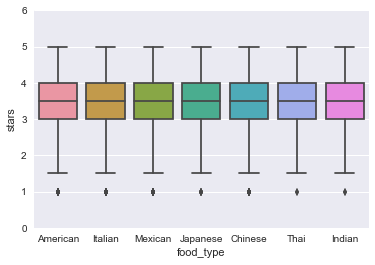

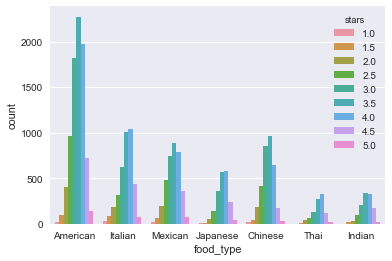

In [5]:
# First let's check the average rating for different "types of food" 

print (df_restaurant_eng.groupby('food_type')['stars'].agg(['mean','std','count']))


sns.boxplot(x='food_type', y='stars' , data=df_restaurant_eng)
plt.ylim(0,6)
plt.show()

sns.countplot(x='food_type' , hue='stars' , data=df_restaurant_eng)
plt.show()

At the first glance, the above charts and table show that there is no significant difference across "type of food" in ratings. However, I am going to test it statisticaly. 

In [6]:
# Separate the whole restaurant_eng dataset into different types of food

amr_star = df_restaurant_eng['stars'].loc[ df_restaurant_eng['food_type'] == 'American'].tolist()
chi_star =  df_restaurant_eng['stars'].loc[ df_restaurant_eng['food_type'] == 'Chinese'].tolist()
ita_star = df_restaurant_eng['stars'].loc[ df_restaurant_eng['food_type'] == 'Italian'].tolist()
ind_star = df_restaurant_eng['stars'].loc[ df_restaurant_eng['food_type'] == 'Indian'].tolist()
thai_star = df_restaurant_eng['stars'].loc[ df_restaurant_eng['food_type'] == 'Thai'].tolist()
mex_star = df_restaurant_eng['stars'].loc[ df_restaurant_eng['food_type'] == 'Mexican'].tolist()
jap_star = df_restaurant_eng['stars'].loc[ df_restaurant_eng['food_type'] == 'Japanese'].tolist()


In [7]:
# Check distribution of "ratings" (whether is normal or not) across each or any types of food

normal_result_chi = stats.normaltest(chi_star)
print (normal_result_chi)

NormaltestResult(statistic=69.37379897402913, pvalue=8.623249630150212e-16)


As an example, we checked the "Chinese" food and we can reject the null hypothesis and observed that the distribution is not normal (p-value < 0.05), so we can not use ANOVA test. 

I am going to use *** Kruskal-Wallis *** to check whether type of food affects the reviewers' ratings or not. In this question, the null hypothesis is that there is no difference between the means of the ratings of different types of food.       
**** Kruskal-Wallis is used to compare the means of three or more samples when the sample distribution is not normal. 

In [25]:
# check the Kruskal-Wallis of ratings across food types

kruskal_result_food_type = stats.kruskal(chi_star,ita_star,mex_star,ind_star,amr_star,thai_star,jap_star)
print (kruskal_result_food_type)

KruskalResult(statistic=1.3846679637267052, pvalue=0.23930762083875023)


The p-value is very small, so we can reject the null hypothesis and we can say the ** food type can impact the restaurant ratings. **     
If the test has be done separately, we can notice that the "indian" , "thai" and "japanese" foods (highest earned ratings) are very similar, also "american" and "mexican" are similar in terms of the ratings that they recieved on average.    
In conclusion, users tend to give the better ratings to 'indian', 'that' and 'japanese' restaurants and type of food matters in restaurant ratings. 

**** 2 -  "In which countries do users tend to give higher ratings to restaurants ?  Does the "country" in which restaurant located  impact the ratings that it is received and if so is this difference statistically significant or not ? " ****

             mean       std  count
country                           
CAN      3.426333  0.769820  16819
UK       3.765655  0.686447   1549
USA      3.395069  0.803634  30196


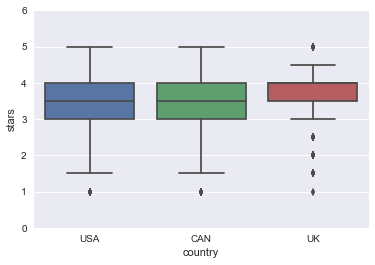

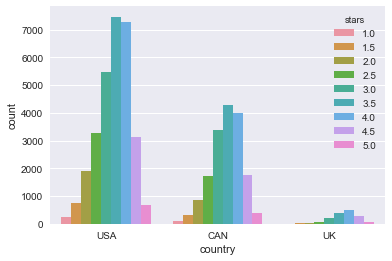

In [9]:
# First let's check the average rating for different "countries"

print (df_restaurant_eng.groupby('country')['stars'].agg(['mean','std','count']))


sns.boxplot(x='country', y='stars' , data=df_restaurant_eng)
plt.ylim(0,6)
plt.show()

sns.countplot(x='country' ,  hue='stars' , data=df_restaurant_eng)
plt.show()

In [10]:
# Separate the whole restaurant_eng dataset into different 'countris'

usa_star = df_restaurant_eng['stars'].loc[ df_restaurant_eng['country'] == 'USA'].tolist()
uk_star =  df_restaurant_eng['stars'].loc[ df_restaurant_eng['country'] == 'UK'].tolist()
can_star = df_restaurant_eng['stars'].loc[ df_restaurant_eng['country'] == 'CAN'].tolist()

In [11]:
# Check distribution of "ratings" (whether is normal or not) across each or any 'country'

normal_result_usa = stats.normaltest(usa_star)
print (normal_result_usa)

NormaltestResult(statistic=1048.1836589291534, pvalue=2.453637796153707e-228)


As an example, I checked the "American" as a country and we can reject the null hypothesis and the distribution is not normal (p-value < 0.05), so like the previous part I am going to use *** Kruskal-Wallis *** test. 

In [26]:
# check the Kruskal-Wallis of ratings across countries (UK, USA , CAN)

kruskal_result_country = stats.kruskal(can_star,usa_star,uk_star)
print (kruskal_result_country)

KruskalResult(statistic=327.9444527013942, pvalue=6.134326823209562e-72)


The p-value is very small ( p < 0.05) so we can reject the null hypothesis (in all counries users tend to give similar ratings), and we could say *** the place of restaurant can impact the ratings *** that it received.    
It seems that people in UK tend to give higher ratings to restaurants compared to the people in US and Canada.  

**** 3 -  "Which type of food has higher review_counts ? Is there a statistical difference between different types of food? " ****

                mean         std  count  median
food_type                                      
American   95.094036  213.269908   8401      33
Chinese    46.087101   98.337412   3318      18
Indian     45.209264   84.383713   1209      17
Italian    64.285111  129.511216   3788      21
Japanese   97.183570  176.343833   1972      40
Mexican    69.134850  133.862843   3604      27
Thai       82.531850  184.999957    989      28


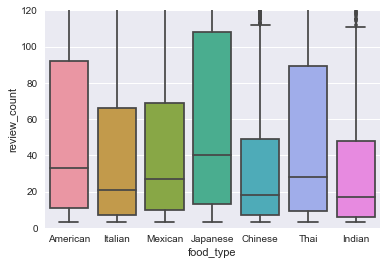

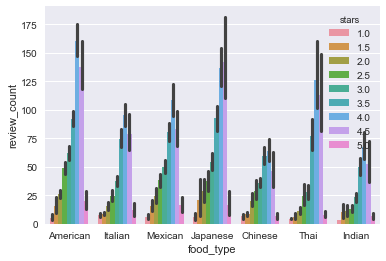

In [13]:
# First let's check the average "review_count" for different types of food 

print (df_restaurant_eng.groupby('food_type')['review_count'].agg(['mean','std','count','median']))


sns.boxplot(x='food_type', y='review_count' , data=df_restaurant_eng)
plt.ylim(0,120)
plt.show()

sns.barplot(x='food_type' , y='review_count' , hue='stars' , data=df_restaurant_eng)
plt.show()

In [14]:
# Separate the whole restaurant_eng dataset into different types of food 

amr_review_count = df_restaurant_eng['review_count'].loc[ df_restaurant_eng['food_type'] == 'American'].tolist()
chi_review_count =  df_restaurant_eng['review_count'].loc[ df_restaurant_eng['food_type'] == 'Chinese'].tolist()
ita_review_count = df_restaurant_eng['review_count'].loc[ df_restaurant_eng['food_type'] == 'Italian'].tolist()
ind_review_count = df_restaurant_eng['review_count'].loc[ df_restaurant_eng['food_type'] == 'Indian'].tolist()
thai_review_count = df_restaurant_eng['review_count'].loc[ df_restaurant_eng['food_type'] == 'Thai'].tolist()
mex_review_count = df_restaurant_eng['review_count'].loc[ df_restaurant_eng['food_type'] == 'Mexican'].tolist()
jap_review_count = df_restaurant_eng['review_count'].loc[ df_restaurant_eng['food_type'] == 'Japanese'].tolist()


In [15]:
# Check distribution of "review_count" (whether is normal or not) across each or any 'food_type'

normal_result_ind = stats.normaltest(ind_review_count)
print (normal_result_ind)

NormaltestResult(statistic=1351.9844862645318, pvalue=2.6320794731775446e-294)


As an example, I checked the "Indian" as a type of food and we can reject the null hypothesis and the distribution is not normal (p-value < 0.05), so like the previous part I am going to use *** Kruskal-Wallis *** test.

In [16]:
# check the Kruskal-Wallis of "review_count" across food types

kruskal_result_review_count = stats.kruskal(amr_review_count,chi_review_count,ita_review_count,ind_review_count,thai_review_count,mex_review_count,jap_review_count)
print (kruskal_result_review_count)

KruskalResult(statistic=604.8169977304248, pvalue=2.1315124208468958e-127)


The p-value is very small ( p < 0.05 ), so the null hypothesis can be rejected and we could say the *** types of food can impact the number of reviews in general. ***
In general, Japanese and American restaurants usually get more reviews. On the other hand, Chinese and Indian restaurants get fewer reviews.   

**** 4 -  "Is there a relationship between number of reviews (review_count) and ratings? " ****

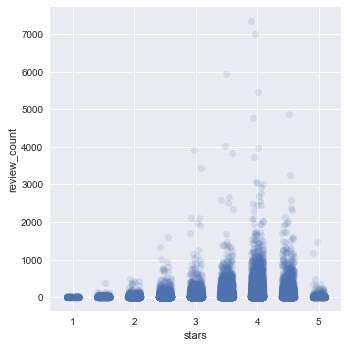

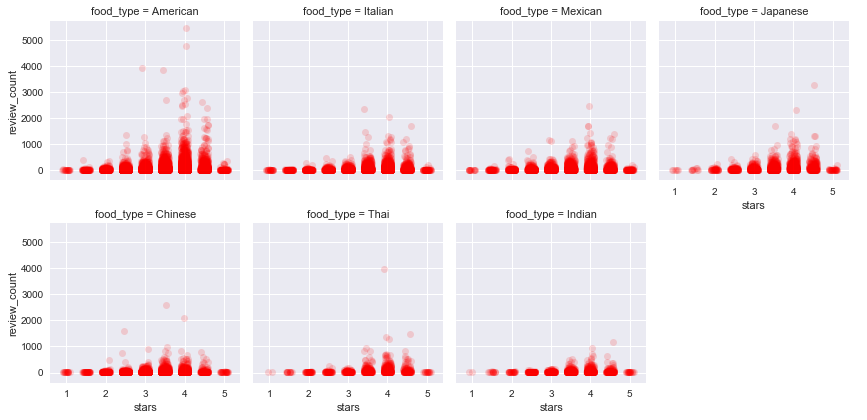

In [17]:
# First let's plot the review_count and ratings  

# For all types of food
sns.lmplot( x="stars", y="review_count", data=df_restaurant_eng, fit_reg=False, legend=False , scatter_kws={"s": 50,"alpha":0.15} ,x_jitter=0.1 )
plt.legend(loc='upper left')
plt.show()

# For different types of food 

g = sns.FacetGrid(df_restaurant_eng, col="food_type", col_wrap=4)
g.map(sns.regplot, "stars","review_count" , color ='r' , fit_reg=False, scatter_kws={"alpha": 0.15 },x_jitter=0.1 )
g.add_legend()
plt.show()

In [18]:
# 

df_grp_stars_review_count = df_restaurant_eng.groupby('stars')['review_count'].agg(['mean','median'])
df_grp_stars_review_count = df_grp_stars_review_count.reset_index()
print (df_grp_stars_review_count)

   stars       mean  median
0    1.0   5.620896       4
1    1.5  12.256198       7
2    2.0  17.632184       9
3    2.5  28.971750      12
4    3.0  41.974925      18
5    3.5  66.016231      27
6    4.0  95.941821      31
7    4.5  80.192841      18
8    5.0  16.641093       5


In [19]:
# check the pearson coefficient

print (stats.pearsonr(df_restaurant_eng['stars'], df_restaurant_eng['review_count']))

(0.13600086148023657, 3.578510902258406e-199)


The P-value is very small ( p < 0.05), so we can reject the null hypothesis and we can say *** there is a linear correlation***. However the correlation is  *** very weak (r = 0.13). ***
let's see whether there is any non linear relationship or not. (*** "Spearman rank" *** correlation). 

*** Spearman rank *** test whether of different groups have obvious different rankings or not. 
(The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not) )

In [20]:
# Check the spearman coefficient

stats.spearmanr(df_restaurant_eng['stars'], df_restaurant_eng['review_count'])

SpearmanrResult(correlation=0.16742883969561242, pvalue=3.2176705999819213e-302)

According to the result, the p-value is very small so we can reject the null hypothesis and we can say *** we can can rank the different ratings (stars) based on their number of reviews, although this ranking is not very strong - we can assume it medium. (0.167). ***          
Based on the chart and the results, we can say 4 , 3.5 , and then 4.5 and 3 stars respectively have more number of reviews across ratings.  

**** 5 -  "Is there a correlation between review text features ( "cool" , "useful" , "funny" ) and "rating" ?  ****

In [21]:
# Get general information of 'df_review_restaurant_eng' 

print (df_review_restaurant_eng_processed.info())
print (df_review_restaurant_eng_processed.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957735 entries, 0 to 2957734
Data columns (total 11 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         float64
funny          float64
cool           float64
word_list      object
word_count     int64
dtypes: float64(3), int64(2), object(6)
memory usage: 248.2+ MB
None
        review_id         user_id     business_id  stars        date            text  useful  funny  cool  \
0  v0i_UHJMo_h...  bv2nCi5Qv5v...  0W4lkclzZTh...      5  2016-05-28  love the st...     0.0    0.0   0.0   
1  vkVSCC7xljj...  bv2nCi5Qv5v...  AEx2SYEUJmT...      5  2016-05-28  super simpl...     0.0    0.0   0.0   
2  n6QzIUObkYs...  bv2nCi5Qv5v...  VR6GpWIda3S...      5  2016-05-28  small unass...     0.0    0.0   0.0   
3  MV3CcKScW05...  bv2nCi5Qv5v...  CKC0-MOWMqo...      5  2016-05-28  lesters is ...     0.0    0.0   0.0   
4  IXvOzsEMYti...  bv2nCi5Qv5v

In [22]:
# Plot the correlation between "rating" and text features

df_review_restaurant_grp_star = df_review_restaurant_eng_processed.groupby('stars')['useful','funny','cool'].agg('mean')
df_review_restaurant_grp_star = df_review_restaurant_grp_star.reset_index()
print (df_review_restaurant_grp_star)
print (df_review_restaurant_grp_star.corr())

# check the p-value and pearson coefficient 

print (stats.pearsonr(df_review_restaurant_grp_star['stars'],df_review_restaurant_grp_star['useful']))
print (stats.pearsonr(df_review_restaurant_grp_star['stars'],df_review_restaurant_grp_star['cool']))
print (stats.pearsonr(df_review_restaurant_grp_star['stars'],df_review_restaurant_grp_star['funny']))


# the p-value (for 'stars' and 'cool' is very small, so I am checking the "spearman rank" test)

print (stats.spearmanr(df_review_restaurant_grp_star['stars'],df_review_restaurant_grp_star['cool']))

   stars    useful     funny      cool
0      1  1.364021  0.636963  0.257079
1      2  1.311154  0.588614  0.382864
2      3  1.148570  0.523031  0.583691
3      4  1.170537  0.481549  0.740233
4      5  0.933763  0.327923  0.559142
           stars    useful     funny      cool
stars   1.000000 -0.943383 -0.965419  0.810187
useful -0.943383  1.000000  0.982599 -0.632529
funny  -0.965419  0.982599  1.000000 -0.634964
cool    0.810187 -0.632529 -0.634964  1.000000
(-0.9433830260825843, 0.016033591192047215)
(0.8101868654937545, 0.09639498791388762)
(-0.9654192932903534, 0.007679253787283893)
SpearmanrResult(correlation=0.7, pvalue=0.1881204043741873)


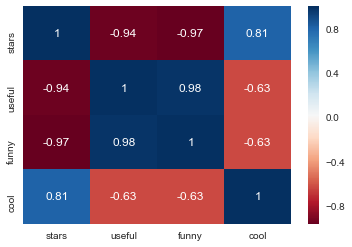

In [23]:
# Plot the heatmap of text features and stars 

sns.heatmap(data=df_review_restaurant_grp_star.corr(), annot=True ,  cmap="RdBu")
plt.show()

According to the above chart, heatmap, and p-values that calculated for each feature, *** " useful " and " funny " *** have a strong negative correlation with ratings and this correlation is statistically significant ( p-values are very small).  In other words, ** lower ratings lead to higher percieved useful and higher percieved funny by other users . *** 

The other feature, *** "cool" *** has a p-value more than 0.05 in two tests (pearson and spearman) , so it's not statistically significant and we can not tell anything about its relationship with stars. 